In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from tensorflow.keras.datasets import imdb
from konlpy.tag import Twitter
from konlpy.tag import Okt
from konlpy.tag import Kkma 
from konlpy.tag import Twitter
from pprint import pprint
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS
from gensim import corpora, models
import numpy  as np
from PIL import Image
from wordcloud import ImageColorGenerator
import glob
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline


In [2]:
ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これは日本語の文章です。'
en_str = 'This is English Sentences.'
ch_str = '统一码'

In [3]:
print(ko_str[1])

것


In [4]:
print(ord(ko_str[0]))
print(ord(ja_str[0]))
print(ord(en_str[0]))
print(ord(ch_str[0]))

51060
12371
84
32479


In [5]:
# Unicode 코드 포인트로 출현 빈도 판정하기 --- (*1)
def count_codePoint(str):
    # Unicode 코드 포인트를 저장할 배열 준비하기 --- (*2)
    counter = np.zeros(65535)
    for i in range(len(str)):
        # 각 문자를 Unicode 코드 포인트로 변환하기 --- (*3)
        code_point = ord(str[i])
        if code_point > 65535 :
            continue
        # 출현 횟수 세기 --- (*4)
        counter[code_point] += 1

    # 각 요소를 문자 수로 나눠 정규화하기 --- (*5)
    counter = counter/len(str)
    return counter

In [6]:
# 학습 전용 데이터 준비하기
ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これは日本語の文章です。'
en_str = 'This is English Sentences.'

x_train = [count_codePoint(ko_str),count_codePoint(ja_str),count_codePoint(en_str)]
y_train = ['ko','ja','en']

In [7]:
print(x_train[0])
print(np.where(x_train[0] > 0))

idx = np.where(x_train[0] > 0)
data = x_train[0]
print(data[idx])



[0. 0. 0. ... 0. 0. 0.]
(array([   32,    46, 44163, 44397, 45768, 45796, 47928, 50612, 51008,
       51060, 51077, 51109, 54620], dtype=int64),)
[0.14285714 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857]


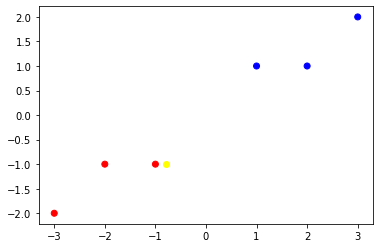

In [14]:
#X = np.array([[-1, -1], [3, 2]])
#Y = np.array([1,  2])

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array(['r','r','r', 'b','b','b'])


color = [ 'red' if y == 'r' else 'blue' for y in Y]

plt.scatter(X[:, 0], X[:, 1], color=color)

t = np.array([[-0.8, -1]])

plt.scatter(t[:,0], t[:,1], color='yellow')

In [16]:
#학습하기
clf =GaussianNB()
clf.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
y_pred=clf.predict([count_codePoint('안녕,어디야')])
print(y_pred)

['ko']


In [21]:
# 평가 전용 데이터 준비하기
ko_test_str = '안녕'
ja_test_str = 'こんにちは'
en_test_str = 'Hello'
x_test = [count_codePoint(en_test_str),count_codePoint(ja_test_str),count_codePoint(ko_test_str)]
y_test = ['en', 'ja', 'ko']

# 평가하기 --- (*7)
y_pred = clf.predict(x_test)
print(y_pred)
print(y_test)
print("정답률 = " , accuracy_score(y_test, y_pred))

['en' 'ja' 'ja']
['en', 'ja', 'ko']
정답률 =  0.6666666666666666


In [22]:
# 학습 데이터 준비하기 --- (*1)
x_train = []
y_train = []
for file in glob.glob('./train_la/*.txt'):
    # 언어 정보를 추출하고 레이블로 지정하기 --- (*2)
    print(file)
    y_train.append(file[8:10])
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기 --- (*3)
    file_str = ''
    for line in open(file, 'r', encoding='UTF8'):
        file_str = file_str + line
    x_train.append(count_codePoint(file_str))

./train_la\de_cat.txt
./train_la\de_dog.txt
./train_la\de_elephant.txt
./train_la\en_cat.txt
./train_la\en_dog.txt
./train_la\en_elephant.txt
./train_la\es_cat.txt
./train_la\es_dog.txt
./train_la\es_elephant.txt


***


In [17]:
corpus=['you know i want your love','i like you','what should i do']

a=" ".join(corpus)
print(a)
word  = a.split(" ")
print(word)

freq={}
for w in word:
    freq[w] = freq.get(w,0)+1
print(freq)



you know i want your love i like you what should i do
['you', 'know', 'i', 'want', 'your', 'love', 'i', 'like', 'you', 'what', 'should', 'i', 'do']
{'you': 2, 'know': 1, 'i': 3, 'want': 1, 'your': 1, 'love': 1, 'like': 1, 'what': 1, 'should': 1, 'do': 1}


In [25]:
vector = CountVectorizer()
tf = vector.fit_transform(corpus)

print(tf)
print(tf.toarray())

#문장, 단어수
print(tf.shape)

  (0, 7)	1
  (0, 1)	1
  (0, 5)	1
  (0, 8)	1
  (0, 3)	1
  (1, 7)	1
  (1, 2)	1
  (2, 6)	1
  (2, 4)	1
  (2, 0)	1
[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
(3, 9)


In [27]:
print(vector.vocabulary_)

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [31]:
print(vector.vocabulary_['you'])
print(vector.vocabulary_.get('you'))


7
7


In [35]:
words=vector.get_feature_names()
for word in words :
    print(word)

print("-----------------------------------------")    
    
    
for key in vector.vocabulary_:
    print(key, vector.vocabulary_[key])
    

do
know
like
love
should
want
what
you
your
-----------------------------------------
you 7
know 1
want 5
your 8
love 3
like 2
what 6
should 4
do 0


***

In [37]:
sent = ["오늘 휴일", 
        "휴일 오늘", 
        "휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다.", 
        " 내일 은 반가운 비 소식 이 있습니다."] 

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) #문장 벡터화 진행
print(tfidf_matrix)
print(type(tfidf_matrix))

  (0, 17)	0.6437444595062429
  (0, 7)	0.7652405313723362
  (1, 17)	0.6437444595062429
  (1, 7)	0.7652405313723362
  (2, 12)	0.28487998702172107
  (2, 6)	0.28487998702172107
  (2, 4)	0.28487998702172107
  (2, 1)	0.28487998702172107
  (2, 9)	0.35310140100264525
  (2, 14)	0.28487998702172107
  (2, 8)	0.35310140100264525
  (2, 13)	0.35310140100264525
  (2, 5)	0.35310140100264525
  (2, 17)	0.19893117008503197
  (2, 7)	0.23647612349029334
  (3, 11)	0.3542556015420614
  (3, 16)	0.3542556015420614
  (3, 3)	0.3542556015420614
  (3, 10)	0.3542556015420614
  (3, 0)	0.3542556015420614
  (3, 2)	0.3542556015420614
  (3, 15)	0.3542556015420614
  (3, 14)	0.28581118874948447
  (3, 17)	0.1995814265359179
  (4, 12)	0.5
  (4, 6)	0.5
  (4, 4)	0.5
  (4, 1)	0.5
<class 'scipy.sparse.csr.csr_matrix'>


In [38]:
print(tfidf_matrix.toarray().shape)
print(tfidf_matrix.toarray())

(5, 18)
[[0.         0.         0.         0.         0.         0.
  0.         0.76524053 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.64374446]
 [0.         0.         0.         0.         0.         0.
  0.         0.76524053 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.64374446]
 [0.         0.28487999 0.         0.         0.28487999 0.3531014
  0.28487999 0.23647612 0.3531014  0.3531014  0.         0.
  0.28487999 0.3531014  0.28487999 0.         0.         0.19893117]
 [0.3542556  0.         0.3542556  0.3542556  0.         0.
  0.         0.         0.         0.         0.3542556  0.3542556
  0.         0.         0.28581119 0.3542556  0.3542556  0.19958143]
 [0.         0.5        0.         0.         0.5        0.
  0.5        0.         0.         0.         0.         0.
  0.5        0.         0.         0.         0.         0.        ]]


In [39]:
features = tfidf_vectorizer.get_feature_names()
print(features)

['갑작스런', '내일', '놀러왔다가', '망연자실', '반가운', '서쪽', '소식', '오늘', '으로', '이어졌는데요', '인해', '있습니', '있습니다', '중심', '폭염', '피해서', '하고', '휴일']


In [2]:
features = tfidf_vectorizer.get_feature_names()
print(features)

C:\Users\student\.conda\envs\py36\lib\site-packages\dask\dataframe\_compat.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm  # noqa: F401


NameError: name 'tfidf_vectorizer' is not defined

In [ ]:
mat = np.array(tfidf_matrix.toarray())
srch=['갑작스런', '휴일']
print([  tfidf_vectorizer.vocabulary_.get(i) for i in srch])

srch_dtm = mat[:, [  tfidf_vectorizer.vocabulary_.get(i) for i in srch]]

#srch_dtm = mat[:, [ 7,17]]   
#srch_dtm = mat[:, 7]   

print(srch_dtm)

In [ ]:
score = srch_dtm.sum(axis=1)
print(score)

for i in range(len(score)):
    if score[i] > 0:
        print('{} / score : {}'.format(sent[i], score[i]))  

In [ ]:
sentences = ['This is the first document.',
              'This is the second document.',
              'And the third one.',
              'Is this the first document?']
vect = TfidfVectorizer()
X = vect.fit_transform(sentences)

In [ ]:
y = [1,1,2,2]
model =  SGDClassifier(loss='perceptron')  
model.fit(X, y)

In [ ]:
X_pred = vect.transform(['My new document third'])
y_pred = model.predict(X_pred)
print(y_pred)

---

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)  # 단어 빈도수 상위 10000개 사용


17465344/17464789 [==============================] - 1s 0us/step


In [4]:
word_to_index=imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [5]:
word_to_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [6]:
index_to_word={}
for key,value in word_to_index.items():
    index_to_word[value]=key

In [7]:
index_to_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [22]:
' '.join([index_to_word[x] for x in X_train[0]])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [23]:
X_train_s=[' '.join([index_to_word[x] for x in X_train[i]]) for i in range(len(X_train))]

In [24]:
X_test_s=[' '.join([index_to_word[x] for x in X_test[i]]) for i in range(len(X_test))]

In [25]:
X_train_s[600]

"the places and social i i was one life is seriously br highly views fact many should movie of and of jane did subsequently escapes to criminals disc \x96 was supposed strange light of directed end his form first as unlikely or sex in gang of you it cockney film walter love and or is time death guy moment see knew such of violence happen between finally should movie even then through some more then through some more vanessa also have what would role have vanessa car have to what would language have poor performances it br on son i i as you landscape time over being quickly to in at shooting was against laugh read has when giant to jr with irs moving any movie from he out is save br and weren't decent like ever family even scientist and an from people it critics to and unfortunately of problem on to what of decent tells passing were romeo no from people and of insights he used funniest has catches jane it's don't by br of decent help with cute and football mildred no poor never stinks w

In [27]:
count_vect=CountVectorizer(analyzer='word')
count_vect.fit(X_train_s+X_test_s)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [28]:
xtrain_count=count_vect.transform(X_train_s)
xtest_count=count_vect.transform(X_test_s)

In [29]:
print(xtrain_count.shape)

(25000, 9774)


In [30]:
print(len(X_train[0]))

218


In [32]:
model=LinearSVC()
model.fit(xtrain_count,y_train)

C:\Users\student\.conda\envs\py36\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [38]:
y_pred = model.predict(xtest_count)
print(len(y_pred))
print(y_pred)
sum((y_test == y_pred)*1) / len(y_pred)

25000
[0 1 1 ... 0 0 1]


0.83

In [43]:
text = 'good story'
text_count = count_vect.transform([text])
y_pred=model.predict(text_count)
print(y_pred)

[0]


---

In [3]:
#형태소 분석기
okt=Okt()
malist=okt.pos("아버지 가방에 들어가신다",norm=True,stem=True)
print(malist)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb')]


In [4]:
print(okt.nouns('오늘 부산 날씨 어때'))

['오늘', '부산', '날씨']


In [13]:
print(okt.nouns('짜장면2개,짬뽕2개 주세요'))
print(okt.pos('짜장면2개,짬뽕2개 주세요'))


['짜장면', '개', '짬뽕', '개']
[('짜장면', 'Noun'), ('2', 'Number'), ('개', 'Noun'), (',', 'Punctuation'), ('짬뽕', 'Noun'), ('2', 'Number'), ('개', 'Noun'), ('주세요', 'Verb')]


In [11]:
#서울대에서 만든 형태소 분석기
kkma=Kkma()
#문장분리
print('kkma 문장분리: ', kkma.sentences("안녕하세요,반갑습니다. 저는 로보트입니다"))
#명사 추출
print('kkma 문장분리: ', kkma.nouns("안녕하세요,반갑습니다. 저는 로보트입니다"))

kkma 문장분리:  ['안녕 하세요, 반갑습니다.', '저는 로보트입니다']
kkma 문장분리:  ['안녕', '안녕하세', '하세', '저', '로보트']


---